In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sn
from numpy import linalg as LA
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
headers = list(pd.read_csv("day-headers.csv") )
data = pd.read_csv("day.csv", names=headers, index_col=False, skiprows = [0], delimiter=",") 
# Preview the first 5 lines of the loaded data 
data = data.drop('instant', axis=1)
data = data.drop('dteday', axis=1)
Y = 'cnt'
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#data

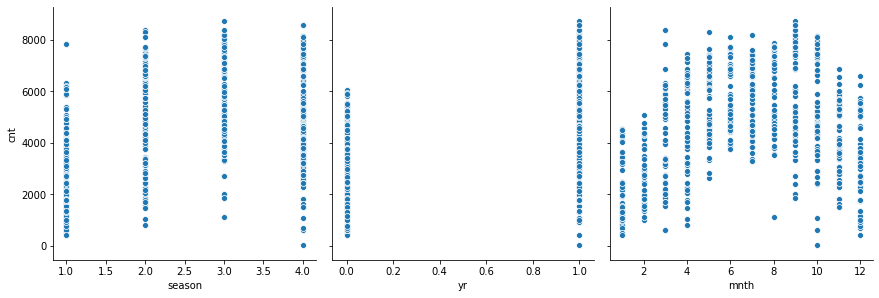

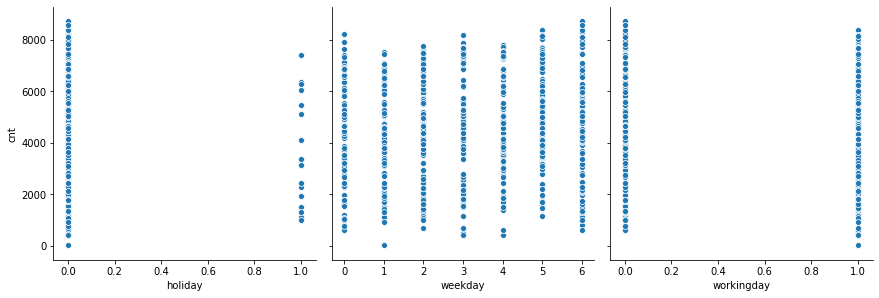

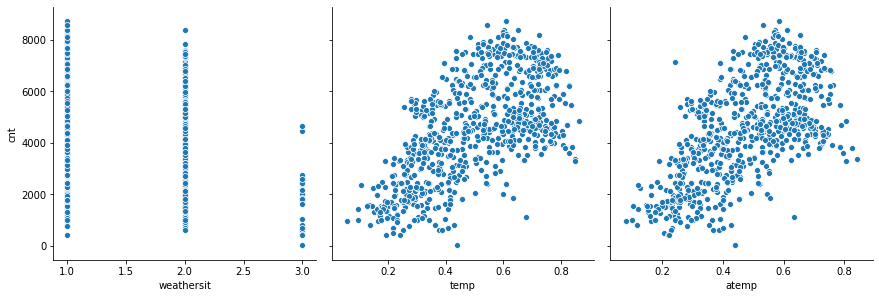

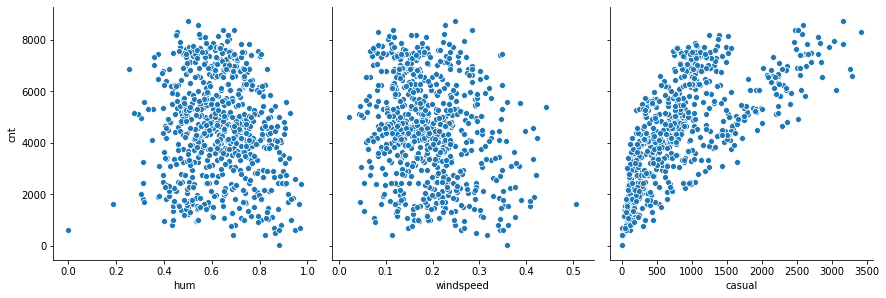

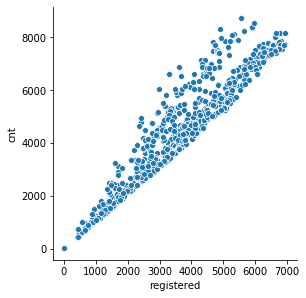

In [4]:
sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[:3],height = 4)
sns.savefig("output1.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[3:6],height = 4)
sns.savefig("output2.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[6:9],height = 4)
sns.savefig("output3.png")

sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[9:12],height = 4)
sns.savefig("output4.png")
sns = sn.pairplot(data, y_vars=[Y], x_vars=data.columns[12:13],height = 4)
sns.savefig("output5.png")

#ax = sn.regplot(x="registered", y=Y, data=data)
#ax.figure.savefig("registered_output.png")

#ax = sn.regplot(x="casual", y=Y, data=data)
#ax.figure.savefig("casual_output.png")

#ax = sn.regplot(x="workingday", y=Y, data=data)
#ax.figure.savefig("workingday_output.png")

In [5]:
def norm_vector(vector):
    return LA.norm(vector)

def normalize_vector(vector):
    return np.array(vector) * (1/norm_vector(vector))

for column in data:
   # Select column contents by column name using [] operator
   columnSeriesObj = normalize_vector(data[column])
   #print('Colunm Name : ', column)
   #print('Column Contents : ', columnSeriesObj)
   data[column] = columnSeriesObj

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.013537,0.0,0.005014,0.0,0.061555,0.000000,0.049386,0.024105,0.026816,0.046293,0.028860,0.011222,0.006086,0.007431
1,0.013537,0.0,0.005014,0.0,0.000000,0.000000,0.049386,0.025458,0.026087,0.039989,0.044705,0.004441,0.006235,0.006043
2,0.013537,0.0,0.005014,0.0,0.010259,0.044721,0.024693,0.013753,0.013968,0.025120,0.044663,0.004068,0.011436,0.010177
3,0.013537,0.0,0.005014,0.0,0.020518,0.044721,0.024693,0.014008,0.015643,0.033919,0.028833,0.003661,0.013530,0.011784
4,0.013537,0.0,0.005014,0.0,0.030778,0.044721,0.024693,0.015896,0.016908,0.025102,0.033618,0.002780,0.014125,0.012070


In [7]:
def cosine_squared(u, v):
    uTv = np.matmul(np.transpose(u),v)
    uTu = np.matmul(np.transpose(u),u)
    vTv = np.matmul(np.transpose(v),v)
    return pow(uTv, 2)/(uTu * vTv)

In [8]:
def max_cosine(data, out_columns, Y):
    best = -10000
    #print(out_columns)
    for column in data:
        if column not in out_columns:
            j = cosine_squared(data[column], data[Y])
            if (j > best):
                best = j
                max_cos = column
    
    return (max_cos, best)

In [9]:
def projection_orthogonal(vector, base):
    return np.subtract(vector, projection(vector, base))

def projection(vector, base):
    #print(vector)
    
    proj = np.zeros(len(vector))
    for w in base:
        x = np.inner(data[w], vector)
        proj = np.add(proj, x * data[w])
    
    return proj


In [10]:
out_columns = [Y]
ordered_features = []
for k in range(len(data.columns) - 1):
    max_similarity, value = max_cosine(data,out_columns, Y)
    out_columns.append(max_similarity)
    ordered_features.append(max_similarity)
    print("k {} : {}".format(k, max_similarity))
    
    for col in data:
        if col not in out_columns or col == Y:
            print("reprojetando {}".format(col))
            p = projection_orthogonal(data[col], data[ordered_features])
            data[col] = p
    
    
ordered_features

k 0 : registered
reprojetando season
reprojetando yr
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando weathersit
reprojetando temp
reprojetando atemp
reprojetando hum
reprojetando windspeed
reprojetando casual
reprojetando cnt
k 1 : casual
reprojetando season
reprojetando yr
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando workingday
reprojetando weathersit
reprojetando temp
reprojetando atemp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 2 : workingday
reprojetando season
reprojetando yr
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando weathersit
reprojetando temp
reprojetando atemp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 3 : temp
reprojetando season
reprojetando yr
reprojetando mnth
reprojetando holiday
reprojetando weekday
reprojetando weathersit
reprojetando atemp
reprojetando hum
reprojetando windspeed
reprojetando cnt
k 4 : atemp
reprojetando season
repr

['registered',
 'casual',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'weekday',
 'season',
 'mnth',
 'holiday',
 'weathersit',
 'windspeed',
 'yr']

In [11]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())

def select_bests_params(results):
    df_results = pd.DataFrame(results)
    return df_results.sort_values([1],  ascending=True)

# least squares via QR decomposition
from numpy.linalg import inv
from numpy.linalg import qr

def qr_coef(X, y):
    # QR decomposition
    Q, R = qr(X)
    b = inv(R).dot(Q.T).dot(y)
    return b


In [12]:
results = []
for i in range(len(ordered_features)):
    d =  data[ordered_features[:i+1]].values
    X_train, X_test, y_train, y_test = train_test_split(d,  data[Y].values, test_size=0.3, random_state=42)

    #QR decoposition
    coefs = qr_coef(X_train, y_train)
    y_pred = X_test.dot(coefs)
    
    # The mean squared error
    rmse_result = rmse(y_test, y_pred)
    #print(rmse_result)
    results.append([i, rmse_result])

ranking = select_bests_params(results)
graph_result = pd.DataFrame(results)
print(ranking)


     0             1
12  12  2.800925e-18
11  11  5.558795e-07
10  10  1.617970e-06
9    9  3.741959e-06
8    8  2.741194e-05
7    7  2.884155e-05
6    6  4.555102e-05
5    5  5.199670e-05
4    4  5.317776e-05
3    3  5.366789e-05
2    2  1.701838e-04
0    0  2.431597e-04
1    1  2.458232e-04


In [13]:
plt.plot( graph_result[0], graph_result[1],  marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.savefig("data.png")
plt.clf()

<Figure size 432x288 with 0 Axes>

In [14]:
data[data.columns[13]]

0     -0.000424
1     -0.000471
2      0.000477
3      0.000391
4      0.000342
         ...   
726    0.000402
727    0.000561
728   -0.000438
729   -0.000223
730    0.000549
Name: cnt, Length: 731, dtype: float64